<a href="https://colab.research.google.com/github/ChiriKamau/soma/blob/main/notebooks/soma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


path = "/content/drive/MyDrive/Soma/Population_scounty_age_gender.csv"


import pandas as pd
df = pd.read_csv(path)

print(df.shape)
print(df.columns)
df.head(10)


Mounted at /content/drive
(48208, 6)
Index(['ewcounty', 'sub-county', 'Age', 'Male', 'Female', 'Total'], dtype='object')


,ewcounty,sub-county,Age,Male,Female,Total
0,BARINGO,ALL,Total,336322,330428,666750
1,BARINGO,ALL,0,8303,7982,16285
2,BARINGO,ALL,1,8669,8417,17086
3,BARINGO,ALL,2,10226,9762,19988
4,BARINGO,ALL,3,10265,10086,20351
5,BARINGO,ALL,4,11045,10276,21321
6,BARINGO,ALL,0 - 4,48508,46523,95031
7,BARINGO,ALL,5,10701,10047,20748
8,BARINGO,ALL,6,10949,10422,21371
9,BARINGO,ALL,7,9595,9082,18677


In [3]:

df_clean = df[df["Age"].astype(str).str.isdigit() | (df["Age"] == "Total")]

df_clean = df_clean.reset_index(drop=True)


print("Original :", len(df))
print("Filtered:", len(df_clean))
df_clean.head(20)


Original : 48208
Filtered: 39586


,ewcounty,sub-county,Age,Male,Female,Total
0,BARINGO,ALL,Total,336322,330428,666750
1,BARINGO,ALL,0,8303,7982,16285
2,BARINGO,ALL,1,8669,8417,17086
3,BARINGO,ALL,2,10226,9762,19988
4,BARINGO,ALL,3,10265,10086,20351
5,BARINGO,ALL,4,11045,10276,21321
6,BARINGO,ALL,5,10701,10047,20748
7,BARINGO,ALL,6,10949,10422,21371
8,BARINGO,ALL,7,9595,9082,18677
9,BARINGO,ALL,8,10276,10027,20303


In [4]:
!pip install geopandas matplotlib

import geopandas as gpd
import matplotlib.pyplot as plt


In [5]:
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_KEN_2.json"
kenya_sub = gpd.read_file(url)
kenya_sub.head()


,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,KEN.1.1_1,KEN,Kenya,KEN.1_1,Baringo,NA,805,NA,NA,Constituency,Constituency,162,NA,"MULTIPOLYGON (((35.8773 -0.0297, 35.8721 -0.02..."
1,KEN.1.2_1,KEN,Kenya,KEN.1_1,Baringo,NA,BaringoCentral,NA,NA,Constituency,Constituency,159,NA,"MULTIPOLYGON (((35.7977 0.3395, 35.7975 0.3322..."
2,KEN.1.3_1,KEN,Kenya,KEN.1_1,Baringo,NA,BaringoNorth,NA,NA,Constituency,Constituency,158,NA,"MULTIPOLYGON (((35.8135 0.6028, 35.8112 0.5971..."
3,KEN.1.4_1,KEN,Kenya,KEN.1_1,Baringo,NA,BaringoSouth,NA,NA,Constituency,Constituency,160,NA,"MULTIPOLYGON (((36.2293 0.4229, 36.2274 0.4026..."
4,KEN.1.5_1,KEN,Kenya,KEN.1_1,Baringo,NA,EldamaRavine,NA,NA,Constituency,Constituency,162,NA,"MULTIPOLYGON (((35.8234 0.0244, 35.834 0.0255,..."


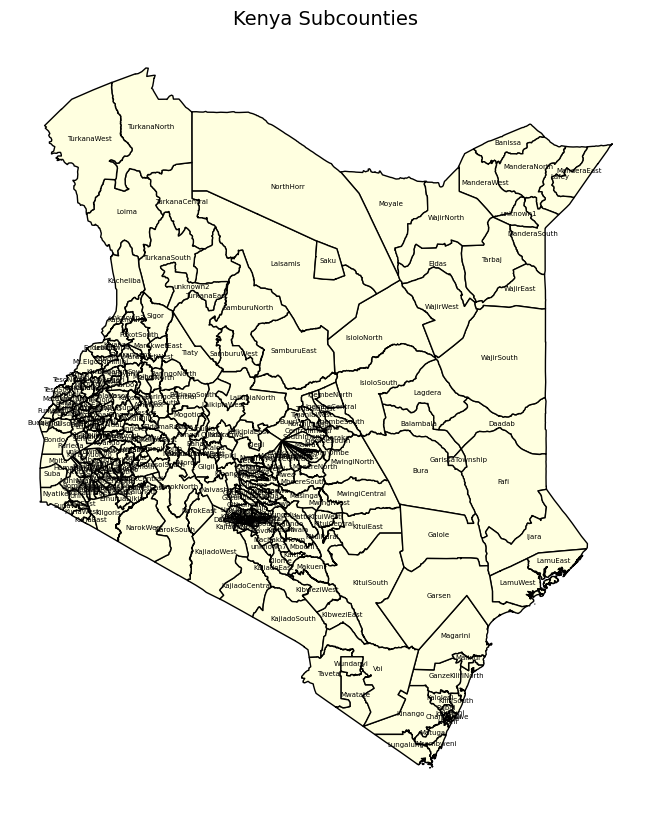

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
kenya_sub.plot(ax=ax, color="lightyellow", edgecolor="black")

# Label each subcounty at its center
for idx, row in kenya_sub.iterrows():
    plt.annotate(
        text=row["NAME_2"],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        fontsize=5, ha="center"
    )

plt.title("Kenya Subcounties", fontsize=14)
plt.axis("off")
plt.show()


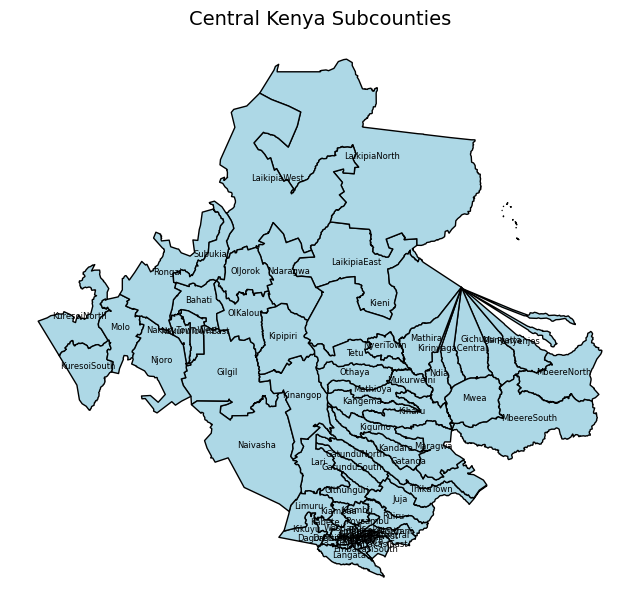

In [7]:
central_counties = ["Nyeri", "Kirinyaga", "Murang'a", "Kiambu", "Nyandarua", "Embu", "Laikipia","Nakuru","Nairobi"]

central_sub = kenya_sub[kenya_sub["NAME_1"].isin(central_counties)]

fig, ax = plt.subplots(figsize=(8,8))
central_sub.plot(ax=ax, color="lightblue", edgecolor="black")

for idx, row in central_sub.iterrows():
    plt.annotate(
        text=row["NAME_2"],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        fontsize=6, ha="center"
    )

plt.title("Central Kenya Subcounties", fontsize=14)
plt.axis("off")
plt.show()


In [7]:

county_pop = df[(df["sub-county"].str.upper() == "ALL") & (df["Age"].str.upper() == "TOTAL")]

county_pop = county_pop[["ewcounty", "Total"]].copy()

print("Number of counties in dataset:", county_pop.shape[0])
county_pop.head()

Number of counties in dataset: 47


,ewcounty,Total
0,BARINGO,666750
984,BOMET,875666
1722,BUNGOMA,1670535
3321,BUSIA,893653
4305,ELGEYO-MARAKWET,454468


In [13]:
import geopandas as gpd


url = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_KEN_1.json"
gdf = gpd.read_file(url)

print("Counties in shapefile:", gdf.shape[0])
gdf.head()


Counties in shapefile: 47


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,KEN.1_1,KEN,Kenya,Baringo,NA,NA,County,County,30,KE.BA,KE-01,"MULTIPOLYGON (((35.7616 -0.1904, 35.7243 -0.19..."
1,KEN.2_1,KEN,Kenya,Bomet,NA,NA,County,County,36,KE.BO,KE-02,"MULTIPOLYGON (((35.2613 -1.0159, 35.2583 -1.02..."
2,KEN.3_1,KEN,Kenya,Bungoma,NA,NA,County,County,39,KE.BN,KE-03,"MULTIPOLYGON (((34.8778 0.8339, 34.9138 0.8524..."
3,KEN.4_1,KEN,Kenya,Busia,NA,NA,County,County,40,KE.BS,KE-04,"MULTIPOLYGON (((34.0292 -0.0142, 34.0158 -0.02..."
4,KEN.5_1,KEN,Kenya,Elgeyo-Marakwet,NA,NA,County,County,28,KE.EM,NA,"MULTIPOLYGON (((35.5272 0.2167, 35.5261 0.2183..."


In [14]:
import re

def normalize_series(s):
    """Uppercase, strip, remove all non-alphanumeric characters (spaces, punctuation)."""
    return s.astype(str).str.upper().str.strip().str.replace(r'[^A-Z0-9]', '', regex=True)

# Normalize and merge
gdf['name_norm'] = normalize_series(gdf['NAME_1'])
county_pop['ewcounty_norm'] = normalize_series(county_pop['ewcounty'])
gdf_merged = gdf.merge(county_pop, left_on='name_norm', right_on='ewcounty_norm', how='left')


Total sub-counties in shapefile: 300
Matched sub-counties: 182
Unmatched sub-counties: ['805', 'BaringoSouth', 'EldamaRavine', 'Tiaty', 'Kabuchai', 'Kanduyi', 'Sirisia', 'WebuteWest', 'WebuyeEast', 'Budalangi', 'Funyula', 'Matayos', 'Manyatta', 'Runyenjes', 'Daadab', 'GarissaTownship', 'HomaBayTown', 'KabondoKasipul', 'Karachuonyo', 'Kasipul', 'Mbita', 'Suba', 'unknown6', 'IsioloNorth', 'IsioloSouth', 'KajiadoEast', 'KajiadoSouth', 'Ikolomani', 'Lurambi', 'Malava', 'Shinyalu', 'Ainamoi', 'KipkelionEast', 'KipkelionWest', 'Sigowet/Soin', 'ThikaTown', 'Gichugu', 'Mwea', 'Ndia', 'Bobasi', 'BomachogeBorabu', 'BomachogeChache', 'Bonchari', 'KitutuChacheNorth', 'KitutuChacheSouth', 'NyaribariChache', 'NyaribariMasaba', 'SouthMugirango', 'KituiEast', 'KituiRural', 'KituiSouth', 'MwingiNorth', 'MwingiWest', 'Kinango', 'MachakosTown', 'Mavoko', 'unknown7', 'Kaiti', 'KibweziEast', 'KibweziWest', 'Kilome', 'Mbooni', 'Banissa', 'ManderaSouth', 'unknown1', 'Laisamis', 'Saku', 'Buuri', 'CentralIment

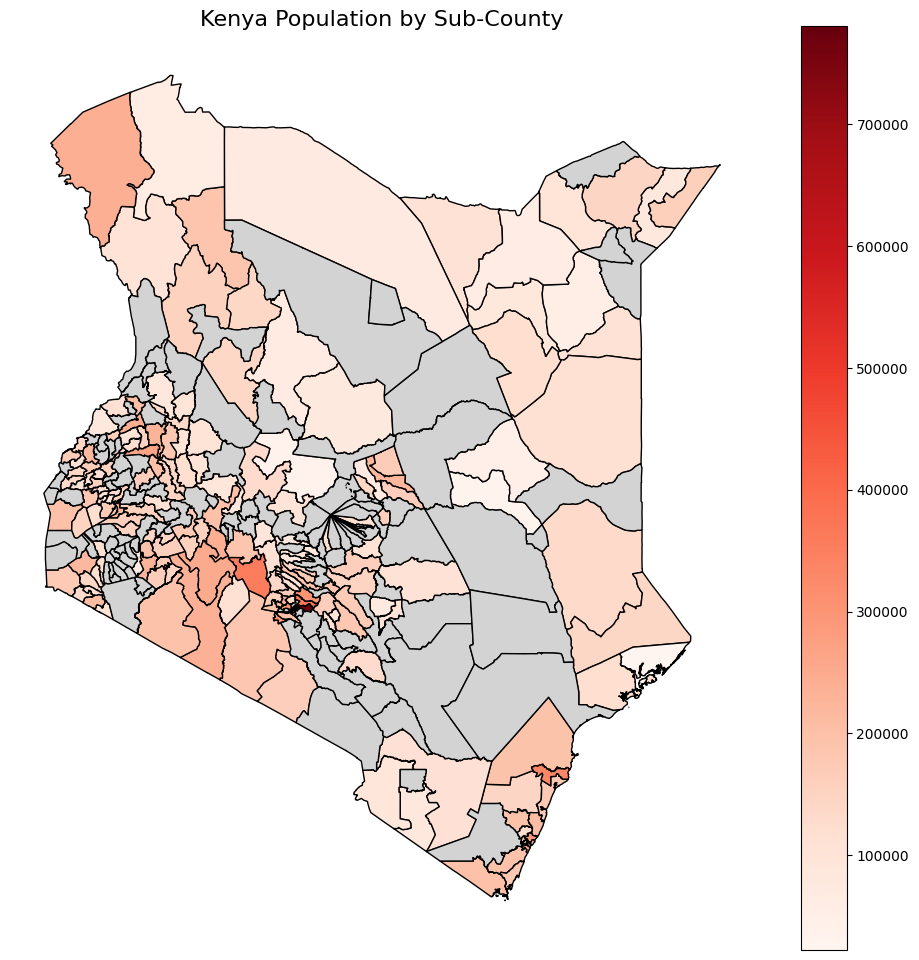

In [21]:
# Filter out county totals, keep only sub-counties, and get total population
subcounty_pop = df[(df['sub-county'] != 'ALL') & (df['Age'] == 'Total')].copy()

# Change URL to sub-counties
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_KEN_2.json"
gdf = gpd.read_file(url)

# Use NAME_2 for sub-counties and match with 'sub-county' column
gdf['name_norm'] = normalize_series(gdf['NAME_2'])
subcounty_pop['subcounty_norm'] = normalize_series(subcounty_pop['sub-county'])

gdf_merged = gdf.merge(subcounty_pop, left_on='name_norm', right_on='subcounty_norm', how='left')

# Rest of your code
gdf_merged["Total"] = pd.to_numeric(gdf_merged["Total"], errors="coerce")
print("Total sub-counties in shapefile:", gdf.shape[0])
print("Matched sub-counties:", gdf_merged["Total"].notna().sum())
print("Unmatched sub-counties:", gdf_merged.loc[gdf_merged["Total"].isna(), "NAME_2"].tolist())

fig, ax = plt.subplots(figsize=(12, 12))
gdf_merged.plot(
    column="Total",
    cmap="Reds",
    legend=True,
    ax=ax,
    edgecolor="black",
    missing_kwds={"color": "lightgrey", "label": "No data"}
)
ax.set_title("Kenya Population by Sub-County", fontsize=16)
ax.axis("off")
plt.show()

In [22]:
# Let's see what the actual names look like after normalization
print("Sample shapefile names (original):")
print(gdf['NAME_2'].head(10).tolist())

print("\nSample shapefile names (normalized):")
print(gdf['name_norm'].head(10).tolist())

print("\nSample data names (original):")
print(subcounty_pop['sub-county'].head(10).tolist())

print("\nSample data names (normalized):")
print(subcounty_pop['subcounty_norm'].head(10).tolist())

# Check for a specific example like Baringo South
baringo_shapefile = gdf[gdf['NAME_2'].str.contains('Baringo', case=False, na=False)]['NAME_2'].tolist()
baringo_data = subcounty_pop[subcounty_pop['sub-county'].str.contains('BARINGO', case=False, na=False)]['sub-county'].tolist()

print(f"\nBaringo sub-counties in shapefile: {baringo_shapefile}")
print(f"Baringo sub-counties in data: {baringo_data}")

# Check their normalized versions
print(f"\nNormalized shapefile: {[normalize_series(pd.Series([name])).iloc[0] for name in baringo_shapefile]}")
print(f"Normalized data: {[normalize_series(pd.Series([name])).iloc[0] for name in baringo_data]}")

Sample shapefile names (original):
['805', 'BaringoCentral', 'BaringoNorth', 'BaringoSouth', 'EldamaRavine', 'Mogotio', 'Tiaty', 'BometCentral', 'BometEast', 'Chepalungu']

Sample shapefile names (normalized):
['805', 'BARINGOCENTRAL', 'BARINGONORTH', 'BARINGOSOUTH', 'ELDAMARAVINE', 'MOGOTIO', 'TIATY', 'BOMETCENTRAL', 'BOMETEAST', 'CHEPALUNGU']

Sample data names (original):
['BARINGO CENTRAL', 'BARINGO NORTH', 'EAST POKOT', 'KOIBATEK', 'MARIGAT', 'MOGOTIO', 'TIATY EAST', 'BOMET EAST', 'CHEPALUNGU', 'KONOIN']

Sample data names (normalized):
['BARINGOCENTRAL', 'BARINGONORTH', 'EASTPOKOT', 'KOIBATEK', 'MARIGAT', 'MOGOTIO', 'TIATYEAST', 'BOMETEAST', 'CHEPALUNGU', 'KONOIN']

Baringo sub-counties in shapefile: ['BaringoCentral', 'BaringoNorth', 'BaringoSouth']
Baringo sub-counties in data: ['BARINGO CENTRAL', 'BARINGO NORTH']

Normalized shapefile: ['BARINGOCENTRAL', 'BARINGONORTH', 'BARINGOSOUTH']
Normalized data: ['BARINGOCENTRAL', 'BARINGONORTH']


In [23]:
# First, let's see all unmatched names from both sides
print("=== UNMATCHED ANALYSIS ===")

# Shapefile names not in data
shapefile_unmatched = gdf[~gdf['name_norm'].isin(subcounty_pop['subcounty_norm'])]['NAME_2'].tolist()
print(f"\nShapefile sub-counties not found in data ({len(shapefile_unmatched)}):")
for i, name in enumerate(sorted(shapefile_unmatched)[:20]):  # Show first 20
    print(f"{i+1:2d}. {name}")
if len(shapefile_unmatched) > 20:
    print(f"... and {len(shapefile_unmatched)-20} more")

# Data names not in shapefile
data_unmatched = subcounty_pop[~subcounty_pop['subcounty_norm'].isin(gdf['name_norm'])]['sub-county'].tolist()
print(f"\nData sub-counties not found in shapefile ({len(data_unmatched)}):")
for i, name in enumerate(sorted(data_unmatched)[:20]):  # Show first 20
    print(f"{i+1:2d}. {name}")
if len(data_unmatched) > 20:
    print(f"... and {len(data_unmatched)-20} more")

print(f"\n=== SUMMARY ===")
print(f"Total shapefile sub-counties: {len(gdf)}")
print(f"Total data sub-counties: {len(subcounty_pop)}")
print(f"Currently matched: {gdf_merged['Total'].notna().sum()}")
print(f"Shapefile unmatched: {len(shapefile_unmatched)}")
print(f"Data unmatched: {len(data_unmatched)}")

# Let's also check if there are similar names that could be manually mapped
print(f"\n=== POTENTIAL MATCHES (first 10) ===")
from difflib import get_close_matches

for unmatched in sorted(data_unmatched)[:10]:
    matches = get_close_matches(unmatched, [name.upper().replace(' ', '') for name in gdf['NAME_2']], n=3, cutoff=0.6)
    if matches:
        print(f"'{unmatched}' might match: {matches}")

=== UNMATCHED ANALYSIS ===

Shapefile sub-counties not found in data (118):
 1. 805
 2. Ainamoi
 3. Aldai
 4. AlegoUsonga
 5. Bahati
 6. Banissa
 7. BaringoSouth
 8. Bobasi
 9. BomachogeBorabu
10. BomachogeChache
11. Bonchari
12. Budalangi
13. Bura
14. Buuri
15. CentralImenti
16. Cherangany
17. Chuka/Igambang'Ombe
18. Daadab
19. DagorettiNorth
20. DagorettiSouth
... and 98 more

Data sub-counties not found in shapefile (164):
 1. ABERDARE FOREST
 2. ABERDARE FOREST
 3. ABERDARE NATIONA
 4. ATHI RIVER
 5. BANISA
 6. BUNA
 7. BUNGOMA CENTRAL
 8. BUNGOMA EAST
 9. BUNGOMA NORTH
10. BUNGOMA SOUTH
11. BUNGOMA WEST
12. BUNYALA
13. BUSIA
14. BUURI EAST
15. BUURI WEST
16. CHEPTAIS
17. CHONYI
18. DADAAB
19. DAGORETTI
20. EAST POKOT
... and 144 more

=== SUMMARY ===
Total shapefile sub-counties: 300
Total data sub-counties: 344
Currently matched: 182
Shapefile unmatched: 118
Data unmatched: 164

=== POTENTIAL MATCHES (first 10) ===
'BANISA' might match: ['BANISSA', 'NDIA']
'BUNA' might match: ['B

Applying enhanced matching...
Fuzzy matched: 'WEBUYE WEST' -> 'WEBUYEEAST'
Fuzzy matched: 'EMBU NORTH' -> 'IGEMBENORTH'
Fuzzy matched: 'ISIOLO' -> 'ISIOLONORTH'
Fuzzy matched: 'KIPKELION' -> 'KIPKELIONWEST'
Fuzzy matched: 'KISII CENTRAL' -> 'KITUICENTRAL'
Fuzzy matched: 'KISII SOUTH' -> 'KILIFISOUTH'
Fuzzy matched: 'KITUTU CENTRAL' -> 'KITUICENTRAL'
Fuzzy matched: 'NYAMACHE' -> 'NYAKACH'
Fuzzy matched: 'MWINGI EAST' -> 'MWINGIWEST'
Fuzzy matched: 'MACHAKOS' -> 'MACHAKOSTOWN'
Fuzzy matched: 'MURANG'A EAST' -> 'TURKANAEAST'
Fuzzy matched: 'MURANG'A SOUTH' -> 'TURKANASOUTH'
Fuzzy matched: 'EMBAKASI' -> 'EMBAKASIWEST'
Fuzzy matched: 'NAKURU EAST' -> 'NAKURUTOWNEAST'
Fuzzy matched: 'NAKURU WEST' -> 'NAKURUTOWNWEST'
Fuzzy matched: 'MANGA' -> 'MASINGA'
Fuzzy matched: 'KIENI EAST' -> 'KIBWEZIEAST'
Fuzzy matched: 'KIENI WEST' -> 'KIBWEZIWEST'
Fuzzy matched: 'TANA NORTH' -> 'TURKANANORTH'
Fuzzy matched: 'IGAMBANG'OMBE' -> 'CHUKAIGAMBANGOMBE'
Fuzzy matched: 'MERU SOUTH' -> 'MBEERESOUTH'
Fuzzy mat

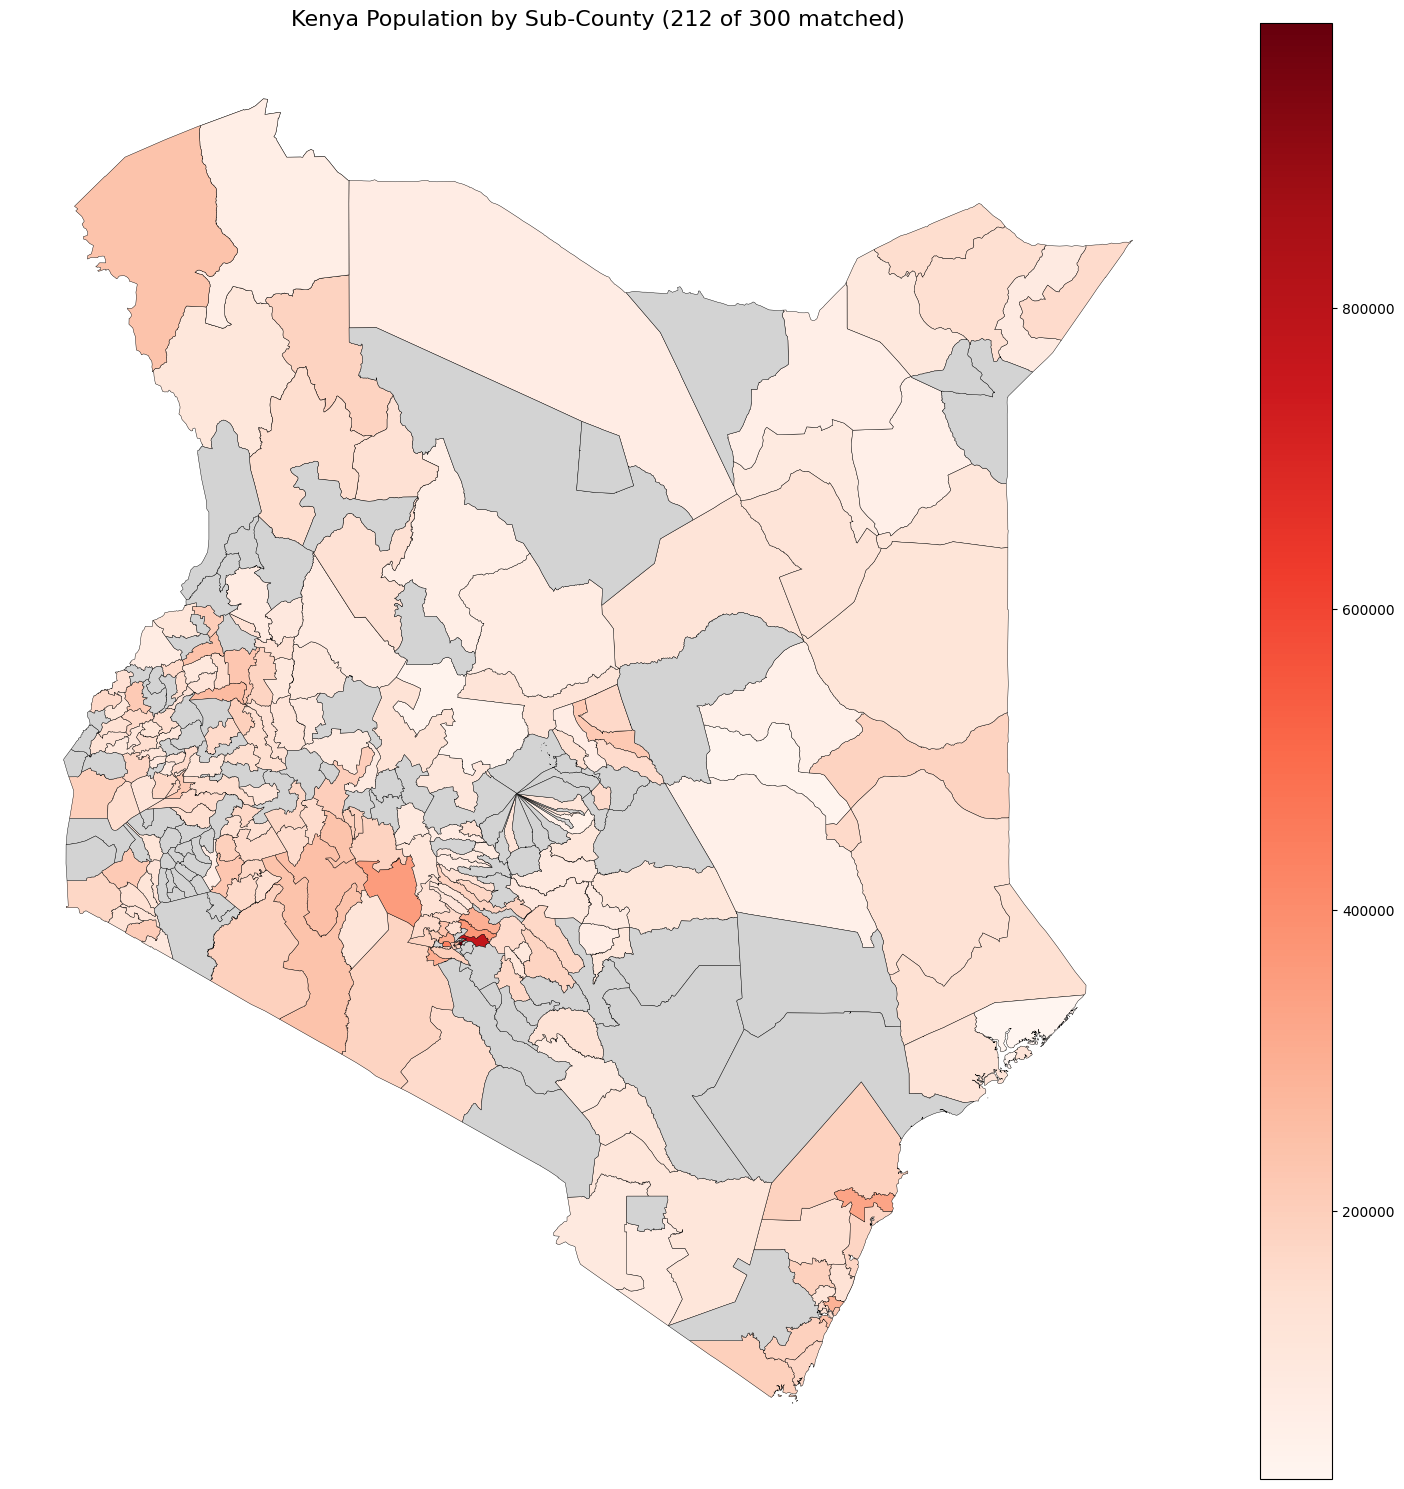

In [24]:
# Create a comprehensive mapping dictionary for known mismatches
name_mapping = {
    # Direct corrections (data name -> shapefile name)
    'BANISA': 'BANISSA',
    'BUNA': 'BURA',
    'DADAAB': 'DAADAB',
    'DAGORETTI': 'DAGORETTINORTH',  # or DAGORETTISOUTH - we'll try both
    'EAST POKOT': 'TIATY',
    'GARISSA': 'GARISSATOWNSHIP',
    'HOMA BAY TOWN': 'HOMABAYTOWN',
    'ISIOLO': 'ISOLONORTH',  # or ISOLOSOUTH
    'KAJIADO CENTRAL': 'KAJIADOCENTRAL',
    'KAJIADO NORTH': 'KAJIADONORTH',
    'KERICHO EAST': 'AINAMOI',
    'LUANDA': 'LURAMBI',
    'MACHAKOS TOWN': 'MACHAKOSTWON',
    'MANDERA CENTRAL': 'MANDERACENTRAL',
    'MANDERA EAST': 'MANDERAEAST',
    'MANDERA NORTH': 'MANDERANORTH',
    'MANDERA SOUTH': 'MANDERASOUTH',
    'MANDERA WEST': 'MANDERAWEST',
    'MOYALE': 'MOYALENORTH',  # or MOYALESOUTH
    'NAKURU TOWN': 'NAKURUTOWNEAST',  # or NAKURUTOWNWEST
    'NANDI CENTRAL': 'NANDIHILLS',
    'NYERI CENTRAL': 'NYERITOWN',
    'SAMBURU CENTRAL': 'SAMBURUCENTRAL',
    'SAMBURU NORTH': 'SAMBURUNORTH',
    'THIKA TOWN': 'THIKATOWN',
    'TINDERET': 'ALDAI',
    # Add more mappings as needed...
}

# Create enhanced matching function
def enhance_matching(subcounty_pop, gdf):
    # Start with original data
    enhanced_pop = subcounty_pop.copy()

    # Apply manual mappings
    for data_name, shapefile_name in name_mapping.items():
        mask = enhanced_pop['sub-county'] == data_name
        if mask.any():
            enhanced_pop.loc[mask, 'subcounty_norm'] = normalize_series(pd.Series([shapefile_name])).iloc[0]

    # Try fuzzy matching for remaining unmatched
    from difflib import get_close_matches

    unmatched = enhanced_pop[~enhanced_pop['subcounty_norm'].isin(gdf['name_norm'])]
    shapefile_names = gdf['name_norm'].tolist()

    for idx, row in unmatched.iterrows():
        data_name_norm = row['subcounty_norm']
        # Find close matches
        matches = get_close_matches(data_name_norm, shapefile_names, n=1, cutoff=0.8)
        if matches:
            enhanced_pop.loc[idx, 'subcounty_norm'] = matches[0]
            print(f"Fuzzy matched: '{row['sub-county']}' -> '{matches[0]}'")

    return enhanced_pop

# Apply enhanced matching
print("Applying enhanced matching...")
enhanced_subcounty_pop = enhance_matching(subcounty_pop, gdf)

# Merge with enhanced matching
gdf_merged_enhanced = gdf.merge(enhanced_subcounty_pop, left_on='name_norm', right_on='subcounty_norm', how='left')

# Make sure Total is numeric
gdf_merged_enhanced["Total"] = pd.to_numeric(gdf_merged_enhanced["Total"], errors="coerce")

print(f"\n=== ENHANCED MATCHING RESULTS ===")
print(f"Original matches: {gdf_merged['Total'].notna().sum()}")
print(f"Enhanced matches: {gdf_merged_enhanced['Total'].notna().sum()}")
print(f"Improvement: +{gdf_merged_enhanced['Total'].notna().sum() - gdf_merged['Total'].notna().sum()}")

# Show remaining unmatched
remaining_unmatched = gdf_merged_enhanced.loc[gdf_merged_enhanced["Total"].isna(), "NAME_2"].tolist()
print(f"Still unmatched: {len(remaining_unmatched)}")
if len(remaining_unmatched) <= 20:
    print("Remaining unmatched:", remaining_unmatched)
else:
    print("First 20 remaining unmatched:", remaining_unmatched[:20])

# Create the enhanced map
fig, ax = plt.subplots(figsize=(15, 15))
gdf_merged_enhanced.plot(
    column="Total",
    cmap="Reds",
    legend=True,
    ax=ax,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={"color": "lightgrey", "label": "No data"}
)
ax.set_title(f"Kenya Population by Sub-County ({gdf_merged_enhanced['Total'].notna().sum()} of 300 matched)", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()

In [15]:

# Make sure Total is numeric (fixes wrong legend sorting)
gdf_merged["Total"] = pd.to_numeric(gdf_merged["Total"], errors="coerce")

print("Total counties in shapefile:", gdf.shape[0])
print("Matched counties:", gdf_merged["Total"].notna().sum())
print("Unmatched counties:", gdf_merged.loc[gdf_merged["Total"].isna(), "NAME_1"].tolist())


Total counties in shapefile: 47
Matched counties: 47
Unmatched counties: []


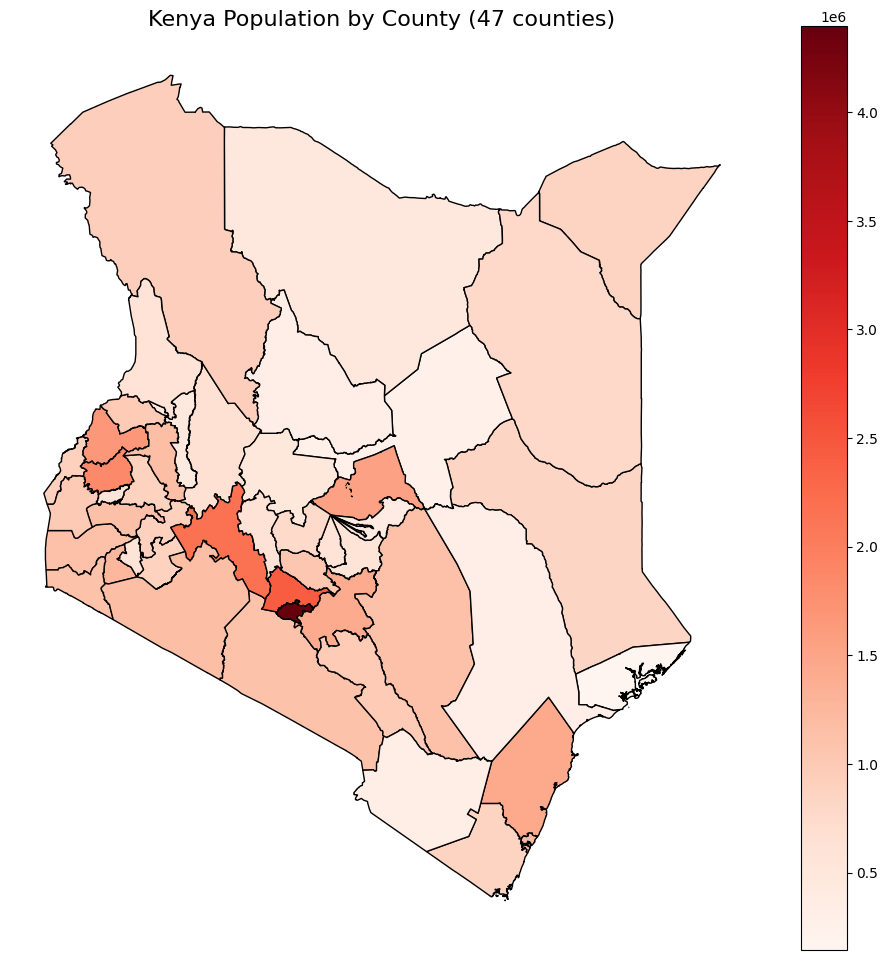

In [18]:
fig, ax = plt.subplots(figsize=(12, 12))
gdf_merged.plot(
    column="Total",
    cmap="Reds",   # lowest = light red/white, highest = dark red
    legend=True,
    ax=ax,
    edgecolor="black",
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

ax.set_title("Kenya Population by County (47 counties)", fontsize=16)
ax.axis("off")
plt.show()


In [21]:

pop_sub = df_clean[df_clean["Age"] == "Total"].copy()

# Standardize name for merging
pop_sub["sub_county"] = pop_sub["sub-county"].str.strip().str.lower()


In [22]:
kenya_sub["sub_county"] = kenya_sub["NAME_2"].str.strip().str.lower()


In [23]:
merged = kenya_sub.merge(pop_sub, on="sub_county", how="left")

print("Total subcounties in shapefile:", kenya_sub.shape[0])
print("Matched with data:", merged["Total"].notna().sum())

# Check if any missing matches
missing = merged[merged["Total"].isna()]["sub_county"].unique()
print("Unmatched subcounties:", missing[:20])  # show first 20


Total subcounties in shapefile: 300
Matched with data: 114
Unmatched subcounties: ['805' 'baringocentral' 'baringonorth' 'baringosouth' 'eldamaravine'
 'tiaty' 'bometcentral' 'bometeast' 'kabuchai' 'kanduyi' 'mt.elgon'
 'sirisia' 'webutewest' 'webuyeeast' 'budalangi' 'funyula' 'matayos'
 'tesonorth' 'tesosouth' 'keiyonorth']


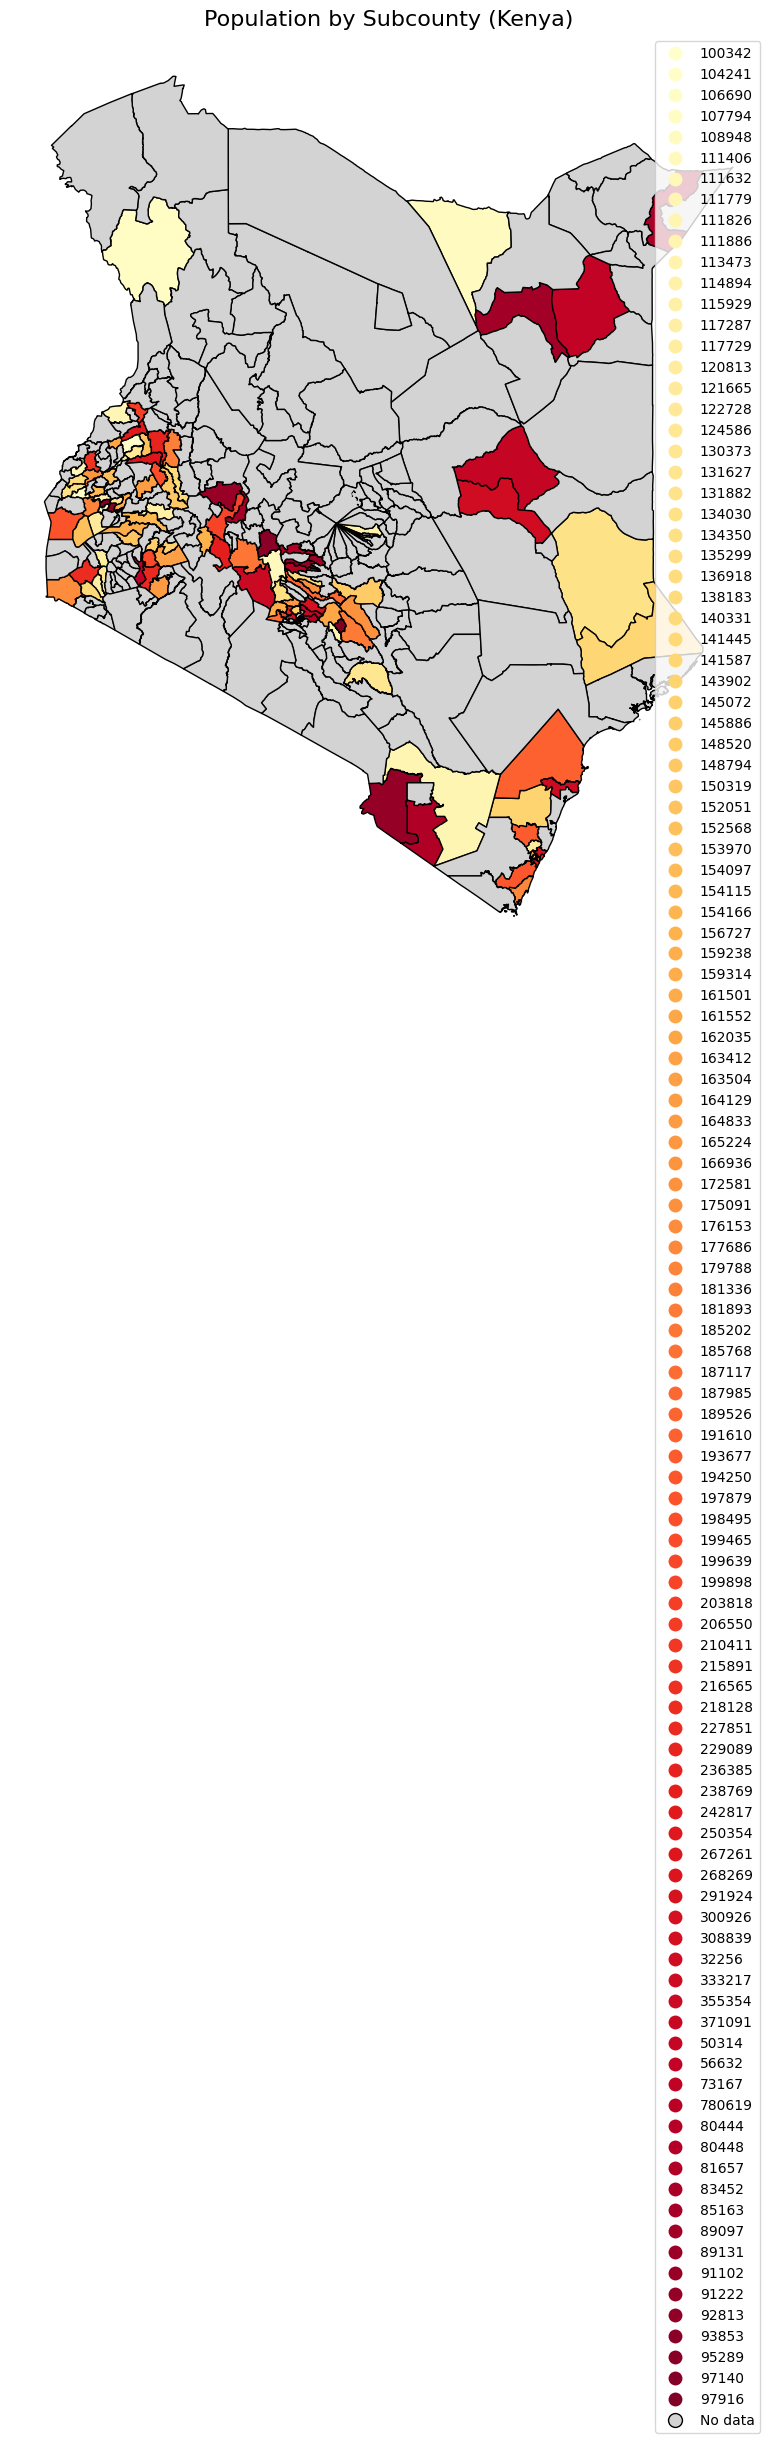

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
merged.plot(
    column="Total",
    cmap="YlOrRd",
    legend=True,
    ax=ax,
    edgecolor="black",
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

plt.title("Population by Subcounty (Kenya)", fontsize=16)
plt.axis("off")
plt.show()


In [28]:
print(gdf.columns)
gdf.head(3)


Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry',
       'NAME_1_norm', 'NAME_norm', 'name_norm'],
      dtype='object')


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,NAME_1_norm,NAME_norm,name_norm
0,KEN.1_1,KEN,Kenya,Baringo,NA,NA,County,County,30,KE.BA,KE-01,"MULTIPOLYGON (((35.7616 -0.1904, 35.7243 -0.19...",BARINGO,BARINGO,BARINGO
1,KEN.2_1,KEN,Kenya,Bomet,NA,NA,County,County,36,KE.BO,KE-02,"MULTIPOLYGON (((35.2613 -1.0159, 35.2583 -1.02...",BOMET,BOMET,BOMET
2,KEN.3_1,KEN,Kenya,Bungoma,NA,NA,County,County,39,KE.BN,KE-03,"MULTIPOLYGON (((34.8778 0.8339, 34.9138 0.8524...",BUNGOMA,BUNGOMA,BUNGOMA


Total subcounties in shapefile: 300
Matched subcounties: 182
Unmatched subcounties (examples):
         NAME_2 sub_county_norm
            805             805
   BaringoSouth    BARINGOSOUTH
   EldamaRavine    ELDAMARAVINE
          Tiaty           TIATY
       Kabuchai        KABUCHAI
        Kanduyi         KANDUYI
        Sirisia         SIRISIA
     WebuteWest      WEBUTEWEST
     WebuyeEast      WEBUYEEAST
      Budalangi       BUDALANGI
        Funyula         FUNYULA
        Matayos         MATAYOS
       Manyatta        MANYATTA
      Runyenjes       RUNYENJES
         Daadab          DAADAB
GarissaTownship GARISSATOWNSHIP
    HomaBayTown     HOMABAYTOWN
 KabondoKasipul  KABONDOKASIPUL
    Karachuonyo     KARACHUONYO
        Kasipul         KASIPUL

CSV subcounty rows with no matching geometry (examples):
     sub-county sub_county_norm
            ALL             ALL
     EAST POKOT       EASTPOKOT
       KOIBATEK        KOIBATEK
        MARIGAT         MARIGAT
     TIATY EAST

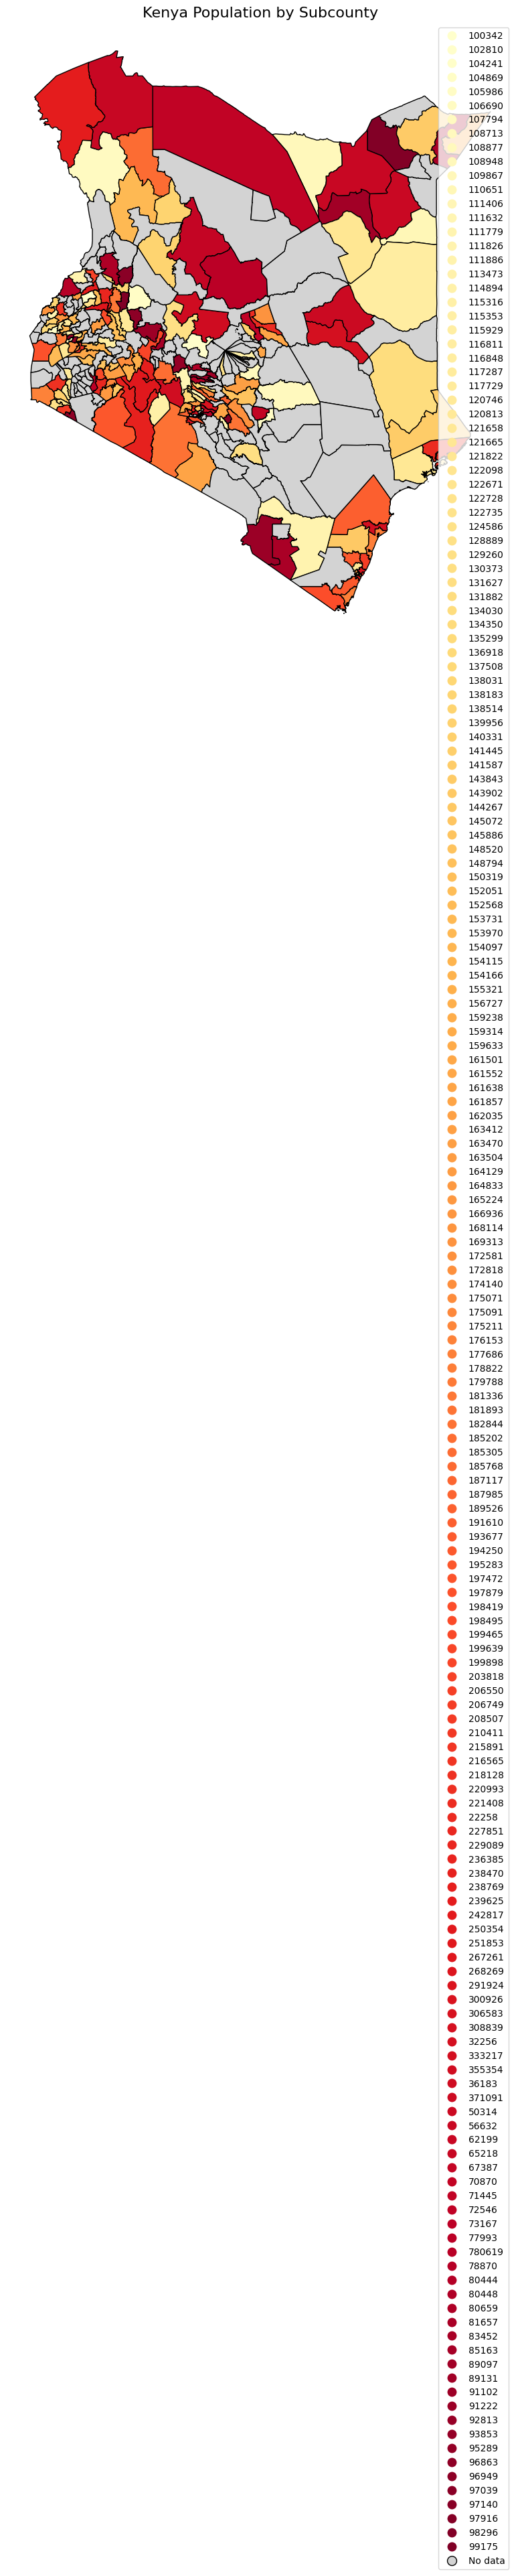

In [31]:
import re

def normalize_series(s):
    """Uppercase, strip, remove ALL non-alphanumeric characters (spaces, punctuation)."""
    return s.astype(str).str.upper().str.strip().str.replace(r'[^A-Z0-9]', '', regex=True)

# Keep only total rows (so we don’t double count by age)
pop_sub = df_clean[df_clean["Age"] == "Total"].copy()

# Normalize names
pop_sub['sub_county_norm'] = normalize_series(pop_sub['sub-county'])
kenya_sub['sub_county_norm'] = normalize_series(kenya_sub['NAME_2'])

# Merge population data with shapefile
merged = kenya_sub.merge(pop_sub, left_on='sub_county_norm', right_on='sub_county_norm', how='left')

print("Total subcounties in shapefile:", kenya_sub.shape[0])
print("Matched subcounties:", int(merged['Total'].notna().sum()))
print("Unmatched subcounties (examples):")
print(merged.loc[merged['Total'].isna(), ['NAME_2','sub_county_norm']].head(20).to_string(index=False))

# Optional: show CSV subcounties with no matching geometry
unmatched_csv = pop_sub[~pop_sub['sub_county_norm'].isin(kenya_sub['sub_county_norm'])]
if not unmatched_csv.empty:
    print("\nCSV subcounty rows with no matching geometry (examples):")
    print(unmatched_csv[['sub-county','sub_county_norm']].head(20).to_string(index=False))

# Plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 12))
merged.plot(
    column='Total',
    cmap='YlOrRd',
    legend=True,
    ax=ax,
    edgecolor='black',
    missing_kwds={'color':'lightgrey', 'label':'No data'}
)
ax.set_title("Kenya Population by Subcounty", fontsize=16)
ax.axis('off')
plt.show()
